In [38]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/dataproducts/desc/DC2/Run1.2p/w_2018_18/data/input")

dataid = {'visit':254349, 'raft':'3,0', 'sensor':'1,1'}

#exp = butler.get('calexp', dataid)
#wcs = exp.getWcs()
raw = butler.get('eimage', dataid)
wcsRaw = raw.getWcs()

In [39]:
#ds9.mtv(exp.getMaskedImage().getImage(),frame=1,wcs=wcs)
#ds9.mtv(exp.getMaskedImage().getMask(),frame=2)
#ds9.mtv(exp.getMaskedImage().getVariance(),frame=3)
ds9.mtv(raw.getMaskedImage().getImage(),frame=4,wcs=wcsRaw)

In [25]:
import lsst.afw.math as afwMath
bkg = butler.get('calexpBackground', dataid)
bkg.getImage()

In [4]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/users/lsstprod/CFHT/slip/input")

#dataid = {'visit':162700, 'raft':'2,4', 'sensor':'1,2'}
dataid = {'visit':733450, 'ccd':3}

raw = butler.get('raw', dataid)
wcsRaw = raw.getWcs()

ds9.mtv(raw.getMaskedImage().getImage(),frame=1,wcs=wcsRaw)

In [1]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/dataproducts/desc/DC2/Run1.1-test/201811000/work/201811023/output")

dataid = {'visit':161984, 'raft':'2,2', 'sensor':'2,1'}

exp = butler.get('calexp', dataid)
wcs = exp.getWcs()

ds9.mtv(exp.getMaskedImage())

ds9 doesn't appear to be running (XPA: 
  File "python/lsst/display/ds9/xpa.cc", line 115, in const char* lsst::display::ds9::{anonymous}::XPASet1(XPA, char*, char*, char*, char*, int)
    XPASet returned 0 {0}
lsst::pex::exceptions::IoError: 'XPASet returned 0'
, (;iconify no; raise)), I'll try to exec it for you


In [4]:
coord = wcs.pixelToSky(0,0)
coord

IcrsCoord(55.82064835737799*afwGeom.degrees, -30.096850004092765*afwGeom.degrees)

In [15]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/users/lsstprod/hsc/SSP_UDEEP_COSMOS/output")

dataid = {'visit':162700, 'raft':'1,4', 'sensor':'1,0'}

exp = butler.get('calexp', dataid)
wcs = exp.getWcs()
#raw = butler.get('raw', dataid)
#wcsRaw = raw.getWcs()

ds9.mtv(exp.getMaskedImage().getImage(),frame=1,wcs=wcs)
#ds9.mtv(raw.getMaskedImage().getImage(),frame=2,wcs=wcsRaw)
ds9.mtv(exp.getMaskedImage().getMask(),frame=2)
ds9.mtv(exp.getMaskedImage().getVariance(),frame=3)

In [1]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/users/lsstprod/desc/DC2-test/output")

dataid = {'visit':162700, 'raft':'1,4', 'sensor':'1,0'}

exp = butler.get('calexp', dataid)
wcs = exp.getWcs()

sources = butler.get('src', dataid)
schema = sources.getSchema()
keyNames = schema.getNames()
keyDict = {k:schema[k].asKey() for k in keyNames}

In [17]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/users/lsstprod/desc/DC2-test/input")

dataid = {'visit':162700, 'raft':'1,4', 'sensor':'1,0'}

exp = butler.get('eimage', dataid)
wcs = exp.getWcs()


In [18]:
ds9.mtv(exp.getMaskedImage().getImage(),frame=1,wcs=wcs)

In [7]:
import lsst.afw.table as afwTable
import lsst.afw.geom as afwGeom
import lsst.afw.coord as afwCoord
import lsst.afw.image as afwImage
from lsst.meas.algorithms import LoadIndexedReferenceObjectsTask

refConfig = LoadIndexedReferenceObjectsTask.ConfigClass()
refConfig.ref_dataset_name = 'cal_ref_cat'
refTask = LoadIndexedReferenceObjectsTask(butler, config=refConfig)

filt = 'lsst_i_smeared'

#center = afwCoord.Coord(55.82*afwGeom.degrees, -30*afwGeom.degrees)
center = afwCoord.Coord(52.1*afwGeom.degrees, -27.1*afwGeom.degrees)
radius = 2.
ref = refTask.loadSkyCircle(center, afwGeom.Angle(radius, afwGeom.degrees), filt).refCat.copy(deep=True)

In [17]:
ref.asAstropy()

id,coord_ra,coord_dec,parent,lsst_u_smeared_flux,lsst_g_smeared_flux,lsst_r_smeared_flux,lsst_i_smeared_flux,lsst_z_smeared_flux,lsst_y_smeared_flux,lsst_u_smeared_fluxSigma,lsst_g_smeared_fluxSigma,lsst_r_smeared_fluxSigma,lsst_i_smeared_fluxSigma,lsst_z_smeared_fluxSigma,lsst_y_smeared_fluxSigma,resolved,variable,raJ2000,decJ2000,sigma_raJ2000,sigma_decJ2000,lsst_u,lsst_g,lsst_r,lsst_i,lsst_z,lsst_y,properMotionRa,properMotionDec,parallax,radialVelocity,centroid_x,centroid_y,hasCentroid
,rad,rad,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,bool
1704179847172,0.9302326916687474,-0.46906127698515,-1,3.6786723573298985e-09,3.409473638610784e-08,1.0598094823215672e-07,2.2794667041871678e-07,3.2307011696420465e-07,3.848722377027804e-07,3.388182452798836e-12,3.140241270088545e-11,9.761206061629509e-11,2.0994664212150564e-10,2.975585741254482e-10,3.544804308966733e-10,False,False,53.29840720000001,-26.8752315,2.777777778e-08,2.777777778e-08,29.98535914,27.5681337,26.33807171,25.50581757,25.12697622,24.9375275,0.0,0.0,0.0,0.0,nan,nan,False
1605592944644,0.9300431458704327,-0.46889776906743275,-1,4.273067378575671e-08,3.9695929252424484e-07,1.2313329378963823e-06,2.655154400511181e-06,3.76102327380024e-06,4.469595333371835e-06,3.935640498906994e-11,3.656130197967156e-10,1.1340995469251094e-09,2.4454875768858354e-09,3.464030449862439e-09,4.116649434535096e-09,False,False,53.28754700000001,-26.8658632,2.777777778e-08,2.777777778e-08,27.32055872,24.90333328,23.67327129,22.84101715,22.4621758,22.27272708,0.0,0.0,0.0,0.0,nan,nan,False
1704174405636,0.9302715666246573,-0.46816127232446314,-1,2.4157803751789004e-09,2.4507437113979234e-08,7.093071095631034e-08,2.62165206217387e-07,4.519309046060845e-07,5.804254742647567e-07,2.2250159519338e-12,2.257218374645504e-11,6.532959907338785e-11,2.414630782951461e-10,4.162437456037138e-10,5.345916178544113e-10,False,False,53.3006346,-26.8236651,2.777777778e-08,2.777777778e-08,30.44086198,27.92547732,26.77437478,25.35530145,24.76140454,24.49016412,0.0,0.0,0.0,0.0,nan,nan,False
1605587459076,0.9304255279110129,-0.4684487780446924,-1,8.456978079736082e-09,7.717341682621125e-08,2.3004132315434075e-07,6.184238425567487e-07,9.57009693870626e-07,1.1766826256574569e-06,7.789164663271086e-12,7.107934366377995e-11,2.1187588858712445e-10,5.695894084093065e-10,8.814385019829196e-10,1.0837647492095814e-09,False,False,53.309455899999996,-26.8401379,2.777777778e-08,2.777777778e-08,29.08115085,26.68126501,25.49418994,24.42109928,23.94724503,23.72340647,0.0,0.0,0.0,0.0,nan,nan,False
1704176044036,0.9304609208728579,-0.4684076176581522,-1,3.598877605190328e-09,3.3320110493725485e-08,1.0352952391956184e-07,2.2325239207844355e-07,3.161317539800104e-07,3.7618398344066986e-07,3.3146887700885444e-12,3.068895588790671e-11,9.535421538478144e-11,2.0562305199003445e-10,2.9116810565457327e-10,3.4647825299744217e-10,False,False,53.3114838,-26.8377796,2.777777778e-08,2.777777778e-08,30.00975881,27.59253337,26.36247138,25.53021724,25.15137589,24.96192717,0.0,0.0,0.0,0.0,nan,nan,False
1605583178756,0.9295776767528169,-0.4682750426964743,-1,8.712214047437446e-09,7.973553066010644e-08,2.346551622950692e-07,4.5438101036826105e-07,6.103155578553954e-07,7.089869622716192e-07,8.024245677041114e-12,7.343913771197232e-11,2.1612539147788997e-10,4.185003764054124e-10,5.621214022160715e-10,6.53001124181505e-10,False,False,53.2608776,-26.8301836,2.777777778e-08,2.777777778e-08,29.04978199,26.64561521,25.47439742,24.75667068,24.43679769,24.27194867,0.0,0.0,0.0,0.0,nan,nan,False
1277108807684,0.9295484586262598,-0.468189303622311,-1,3.8627787795564844e-06,3.735526424750096e-05,0.00011182625501418362,0.00023430004548808485,0.000325930162310151,0.00038431986123430066,3.557750734136198e-09,3.440546984045

In [21]:
for r in ref:
    ra = r.get("coord_ra")
    dec = r.get("coord_dec")
    mag = r.get("lsst_i")
    c = afwCoord.IcrsCoord(ra, dec)
    pt = wcsRaw.skyToPixel(c)
    if (pt.getX() > 4000) or (pt.getX()<0) or (pt.getY()>4000) or (pt.getY()<0) or mag > 21:
        continue
    with ds9.Buffering():
        ds9.dot('o', pt.getX(), pt.getY(), frame=4)

In [40]:
ra = []
dec = []
for r in ref:
    mag = r.get("lsst_i")
#    c = afwCoord.IcrsCoord(ra, dec)
#    pt = wcsRaw.skyToPixel(c)
    if mag > 21:
        continue
    ra.append(afwGeom.radToDeg(r.get("coord_ra")))
    dec.append(afwGeom.radToDeg(r.get("coord_dec")))

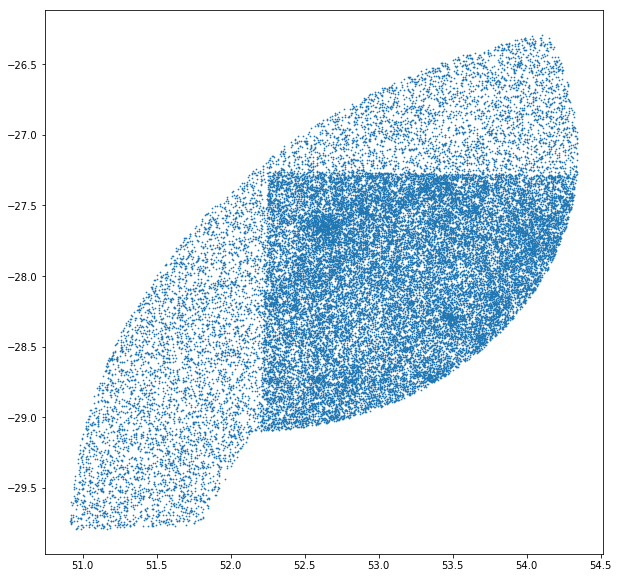

In [42]:
%matplotlib inline
import matplotlib
import matplotlib.pylab as plt
import numpy as np

fig, (ax0) = plt.subplots(ncols=1, figsize=(10, 10))
_ = ax0.scatter(ra, dec, s=0.5)
#fig.savefig('Ref.png')

In [30]:
ra[0]
afwGeom.radToDeg(ra[0])

53.25920353217571

In [2]:
ds9.mtv(exp.getMaskedImage().getImage(),frame=1,wcs=wcs)
for src in sources:
#    if src.get(keyDict["base_CircularApertureFlux_6_0_flag"]):
        centroid = src.getCentroid()
#        print(centroid)
        with ds9.Buffering():
            ds9.dot('+', centroid.getX(), centroid.getY(), frame=1)

In [7]:
schema = src.getSchema()
schema.getOrderedNames()

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'calib_detected',
 'calib_psfCandidate',
 'calib_psfUsed',
 'calib_psf_reserved',
 'deblend_nChild',
 'deblend_deblendedAsPsf',
 'deblend_psfCenter_x',
 'deblend_psfCenter_y',
 'deblend_psfFlux',
 'deblend_tooManyPeaks',
 'deblend_parentTooBig',
 'deblend_masked',
 'deblend_skipped',
 'deblend_rampedTemplate',
 'deblend_patchedTemplate',
 'deblend_hasStrayFlux',
 'base_NaiveCentroid_x',
 'base_NaiveCentroid_y',
 'base_NaiveCentroid_flag',
 'base_NaiveCentroid_flag_noCounts',
 'base_NaiveCentroid_flag_edge',
 'base_NaiveCentroid_flag_resetToPeak',
 'base_SdssCentroid_x',
 'base_SdssCentroid_y',
 'base_SdssCentroid_xSigma',
 'base_SdssCentroid_ySigma',
 'base_SdssCentroid_flag',
 'base_SdssCentroid_flag_edge',
 'base_SdssCentroid_flag_noSecondDerivative',
 'base_SdssCentroid_flag_almostNoSecondDerivative',
 'base_SdssCentroid_flag_notAtMaximum',
 'base_SdssCentroid_flag_resetToPeak',
 'base_Blendedness_old',
 'base_Blendedness_raw_flux',
 'ba

In [14]:
import lsst.afw.geom as afwGeom
pt = afwGeom.Point2D(100,100)
psf = exp.getPsf()
psfIm = psf.computeImage(pt)
ds9.mtv(psfIm,frame=4)

In [20]:
import lsst.afw.image as afwImage

mdRef = butler.get('calexp_md', dataid)
calib = afwImage.Calib(mdRef)

flux = sources[123].get("base_CircularApertureFlux_6_0_flux")
mag = calib.getMagnitude(flux)
mag

21.905373880458264

In [ ]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/dev/lsstprod/hsc/SXDS/output")
dataid = {'visit':912206, 'filter':'r', 'tract':1, 'patch':'7,0', 'ccd':34}

exp = butler.get('deepCoadd_tempExp', dataid)

ds9.mtv(exp.getMaskedImage().getImage(),frame=1)
ds9.mtv(exp.getMaskedImage().getMask(),frame=2)
ds9.mtv(exp.getMaskedImage().getVariance(),frame=3)

In [2]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/sps/lsst/dev/lsstprod/hsc/SXDS/output")
dataid = {'filter':'g', 'tract':0, 'patch':'8,9'}

exp = butler.get('deepCoadd', dataid)

ds9.mtv(exp.getMaskedImage().getImage(),frame=1)
ds9.mtv(exp.getMaskedImage().getMask(),frame=2)
ds9.mtv(exp.getMaskedImage().getVariance(),frame=3)

TypeError: writeFitsImage(): incompatible function arguments. The following argument types are supported:
    1. (fd: int, data: lsst.afw.image.image.image.ImageU, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    2. (filename: unicode, data: lsst.afw.image.image.image.ImageU, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    3. (fd: int, data: lsst.afw.image.image.image.ImageL, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    4. (filename: unicode, data: lsst.afw.image.image.image.ImageL, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    5. (fd: int, data: lsst.afw.image.image.image.ImageI, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    6. (filename: unicode, data: lsst.afw.image.image.image.ImageI, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    7. (fd: int, data: lsst.afw.image.image.image.ImageF, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    8. (filename: unicode, data: lsst.afw.image.image.image.ImageF, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    9. (fd: int, data: lsst.afw.image.image.image.ImageD, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    10. (filename: unicode, data: lsst.afw.image.image.image.ImageD, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    11. (fd: int, data: lsst::afw::image::Mask<unsigned short>, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None
    12. (filename: unicode, data: lsst::afw::image::Mask<unsigned short>, wcs: lsst.afw.image.wcs.wcs.Wcs=0L, title: unicode=0L) -> None

Invoked with: 57, <lsst.afw.image.mask.mask.MaskX object at 0x7fe093ae7d88>, None, ''

In [ ]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/home/boutigny/LSST/CFHT/D3/output")
dataid = {'visit':994925, 'filter':'u', 'ccd':27}

exp = butler.get('raw', dataid)
ds9.mtv(exp.getMaskedImage().getImage(),frame=1)

In [ ]:
cal_md = butler.get('calexp_md', dataid)
RA = cal_md.get("RA")
DEC = cal_md.get("DEC")
filt = cal_md.get("FILTER")

print RA, DEC, filt, cal_md.get("FILTERID"), cal_md.get("QOBSERVE")

In [3]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/home/boutigny/LSST/CFHT/clusters/3C295/output")
dataid = {'visit':860011, 'filter':'r', 'ccd':24}
exp = butler.get('calexp', dataid)
wcs = exp.getWcs()
ds9.mtv(exp.getMaskedImage().getImage(),frame=1, wcs=wcs)

dataid = {'visit':781215, 'filter':'r', 'ccd':34}
exp3 = butler.get('calexp', dataid)
wcs = exp3.getWcs()
ds9.mtv(exp3.getMaskedImage().getImage(),frame=2, wcs=wcs)

In [ ]:
import lsst.daf.persistence as dafPersist
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/home/boutigny/LSST/CFHT/clusters/3C295/output")
dataid = {'visit':967616, 'filter':'r', 'ccd':7}
exp = butler.get('calexp', dataid)
wcs = exp.getWcs()
ds9.mtv(exp.getMaskedImage().getImage(),frame=1, wcs=wcs)

In [8]:
import lsst.daf.persistence as dafPersist
import lsst.afw.image as afwImage
import lsst.afw.display.ds9 as ds9
import numpy

butler = dafPersist.Butler("/home/boutigny/LSST/CFHT/D3/output/coadd_dir")

visit = [793169, 838864, 849375, 895369, 918238, 996230]
ccd = [31, 31, 31, 31, 31, 31]

for i in range(5) :
    v = visit[i]
    c = ccd[i]
    dataid = {'visit':v, 'ccd':c}
    dataidwcs = {'visit':v, 'ccd':c, 'tract':0}
    exp = butler.get('calexp', dataid)
    newWcs = butler.get('wcs', dataidwcs)
#    wcs = afwImage.TanWcs.cast(newWcs.getWcs())
    wcs = exp.getWcs()
    ds9.mtv(exp.getMaskedImage().getImage(),frame=i,wcs=wcs)